### Teilaufgabe 1
Generieren Sie zwei Vektoren `x`,`y`, die jeweils aus 1000 normalverteilten Zufallszahlen mit Mittelwert 0 und Standardabweichung 1 (mit diesen Parametern spricht man von einer Standardnormalverteilung) bestehen.

Verwenden Sie hierfür z.B. `numpy.random.normal`.

Visualisieren Sie die Datenvektoren in einem sog. Jointplot (`seaborn.jointplot`), und überzeugen Sie sich davon, dass die Verteilung jeweils tatsächlich normalverteilt aussieht.

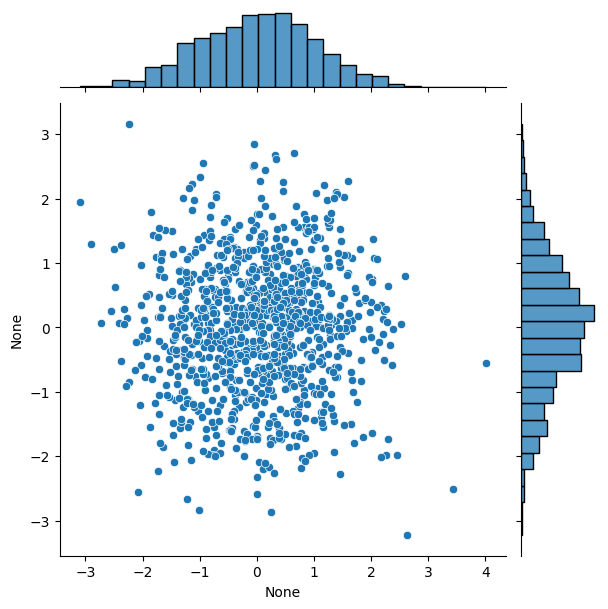

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.normal(loc=0, scale=1, size=1000)

sns.jointplot(x=x, y=y)

# Eine Verteilung (z.B. Normalverteilung) beschreibt die theoretische Verteilung der Daten in möglichen Wertebereichen (z.B.: RR).
# (Tatsächliche Beobachtungen nennt man auch Realisierungen.)
# Verteilungen kann man (wenn sie auf RR leben, nicht auf ab abzählbaren Werten) beschreiben durch eine Dichte:

# P(X in [s,t]) = int_s^t f(x) du
# ^ Zufallszahl

### Teilaufgabe 2
Um die tatsächliche Verteilung mit den aufgrund der verwendeten Normalverteilung erwarteten Verteilung zu vergleichen, modifizieren Sie den Jointplot wie folgt:
1. Fügen Sie das Argument `marginal_kws={"stat":"density"}` hinzu, damit die Histogramme auf Flächeninhalt `1` normiert werden.
2. Speichern Sie den Rückgabewert von `sns.jointplot` in einer Variable `g` und verwenden Sie `g.ax_marg_x.plot(...)`, um das Histogramm mit der Normalverteilungsdichte zu überlagern.

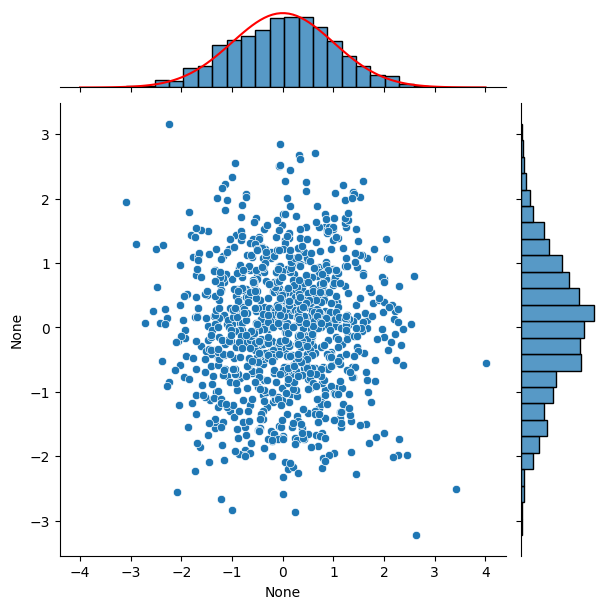

In [23]:
g = sns.jointplot(x=x, y=y, marginal_kws={"stat": "density"})
g.ax_marg_x.plot(
	np.linspace(-4, 4, 100),
	np.exp(-np.linspace(-4, 4, 100) ** 2 / 2) / np.sqrt(2 * np.pi),
	color='red',
	label='Normalverteilung'
)

### Teilaufgabe 3
Ersetzen Sie den Punkt `(x[0], y[0])` durch den Ausreißer `(n,n)`, wobei Sie die Variable `n` zwischen 0 und 1000 z.B. in 10er-Schritten variieren. Berechnen Sie jeweils die Pearson- und Spearman-Korrelation und visualisieren Sie diese geeignet.

In [55]:
import pandas as pd
df = pd.DataFrame({'x': x, 'y': y})
correlations = []


for i in range(0, 1010, 10):
    df.loc[0, "x"] = i
    df.loc[0, "y"] = i
    correlations.append({
        "outlier": i,
        "pearson": df.corr(method="pearson").mean(axis=1).mean(),
        "spearman": df.corr(method='spearman').mean(axis=1).mean(),
    })
df_correlations = pd.DataFrame(correlations)
df_correlations

,outlier,pearson,spearman
0,0,0.504137,0.518784
1,10,0.547712,0.520211
2,20,0.642115,0.520211
3,30,0.734487,0.520211
4,40,0.804964,0.520211
...,...,...,...
96,960,0.999443,0.520211
97,970,0.999454,0.520211
98,980,0.999465,0.520211
99,990,0.999476,0.520211


<Axes: title={'center': 'Correlation vs. Outlier'}, xlabel='Outlier', ylabel='Correlation'>

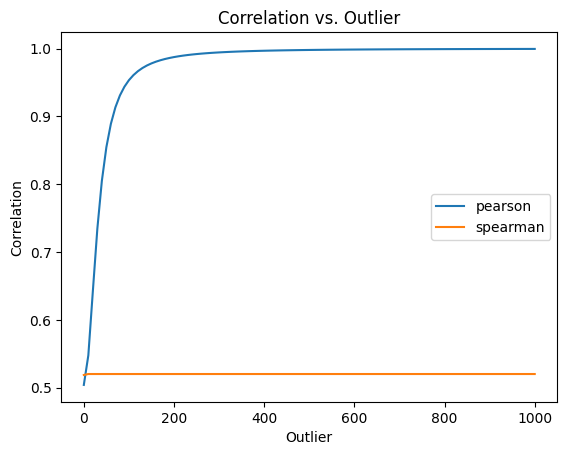

In [57]:
import matplotlib.pyplot as plt

df_correlations.plot(
    x="outlier",
    y=["pearson", "spearman"],
    title="Correlation vs. Outlier",
    xlabel="Outlier",
    ylabel="Correlation",
)


